##### Modelagem

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
customers_info = pd.read_csv("../data/processed/customers_info.csv")

In [37]:
customers_info

,Unnamed: 0,customer_unique_id,total_value,qnt_orders
0,0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1
2,2,0000f46a3911fa3c0805444483337064,86.22,1
3,3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1
4,4,0004aac84e0df4da2b147fca70cf8255,196.89,1
...,...,...,...,...
94978,94978,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,1
94979,94979,fffea47cd6d3cc0a88bd621562a9d061,84.58,1
94980,94980,ffff371b4d645b6ecea244b27531430a,112.46,1
94981,94981,ffff5962728ec6157033ef9805bacc48,133.69,1


In [38]:
customers_info.drop(columns="Unnamed: 0", inplace=True)

In [39]:
features = customers_info[["total_value", "qnt_orders"]]

In [40]:
features

,total_value,qnt_orders
0,141.90,1
1,27.19,1
2,86.22,1
3,43.62,1
4,196.89,1
...,...,...
94978,2067.42,1
94979,84.58,1
94980,112.46,1
94981,133.69,1


##### Padronização variáveis

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
standard_scaler = StandardScaler()
features_std = standard_scaler.fit_transform (features)

In [43]:
features_std

array([[-0.1048263 , -0.16061265],
       [-0.61076899, -0.16061265],
       [-0.35040985, -0.16061265],
       ...,
       [-0.23467507, -0.16061265],
       [-0.14103752, -0.16061265],
       [-0.4150696 , -0.16061265]])

##### Modelagem com KMeans

In [44]:
from sklearn.cluster import KMeans

In [45]:
# Define a quantidade de cluster usando a métrica inércia (homogeneização do cluster) 
# Cria 20 modelos de KMeans variando a quantidade de clusters de 1 a 20
# Calcula a inércia (soma das distâncias quadráticas intra cluster)


wcss = []           # within-cluster sum of squares
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_std)
    wcss.append(kmeans.inertia_)

# Método do Cotovelo: identifica o k que explica "a maior parte"
# da variação nos dados

Text(0, 0.5, 'wcss')

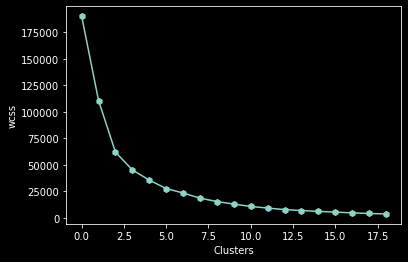

In [46]:
plt.plot(wcss, 'h-')
plt.xlabel('Clusters')
plt.ylabel('wcss')

# É considerado um valor ideal de k quando 
# o aumento no número de clusters não representa
# um valor significativo de ganho.

In [47]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features_std)

KMeans(n_clusters=4)

In [49]:
# Rótulos dos clusters atribuídos
customers_info['cluster'] = kmeans.labels_ 

In [50]:
customers_info

,customer_unique_id,total_value,qnt_orders,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,0
2,0000f46a3911fa3c0805444483337064,86.22,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1,0
4,0004aac84e0df4da2b147fca70cf8255,196.89,1,0
...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,1,3
94979,fffea47cd6d3cc0a88bd621562a9d061,84.58,1,0
94980,ffff371b4d645b6ecea244b27531430a,112.46,1,0
94981,ffff5962728ec6157033ef9805bacc48,133.69,1,0


In [51]:
import seaborn as sb

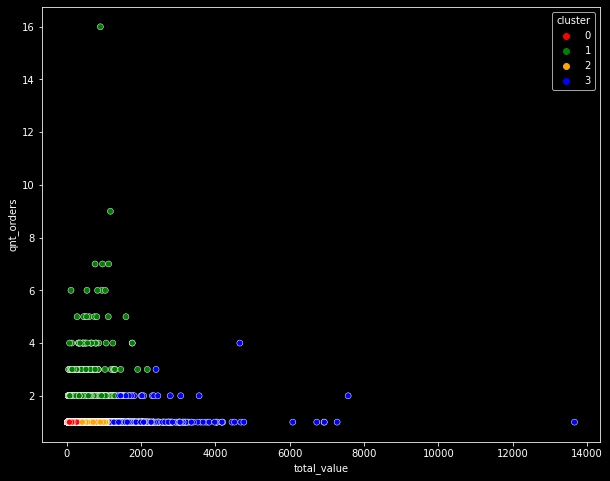

In [68]:
plt.figure(figsize= (10, 8))
ax = sb.scatterplot(x= 'total_value', y='qnt_orders', hue='cluster', data= customers_info, palette= ['red', 'green', 'orange', 'blue'])
plt.show()

In [53]:
customers_info.to_csv("../data/processed/customers_clusters.csv")